In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

sns.set()

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch
my_cmap = 'nipy_spectral'
torch.manual_seed(0)


# https://www.kaggle.com/datasets/akram24/social-network-ads?select=Social_Network_Ads.csv

# from google.colab import drive
# drive.mount('/gdrive',force_remount=True)
# %cd /gdrive/MyDrive/ERIN_LEE/

# data = pd.read_csv('all-data.csv',
#                    encoding='unicode_escape',
#                    names=['Sentiment', 'Text'])

# # Displaying the first few rows of the DataFrame to check its structure and content
# data.head()

# # Convert sentiment labels from textual to numerical format for easier processing
# label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}  # Mapping labels to numerical values
# data['Sentiment'] = data['Sentiment'].replace(label_dict)  # Replacing text labels with corresponding numerical values

# train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)  # 80% for training, 20% for validation
# train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [4]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


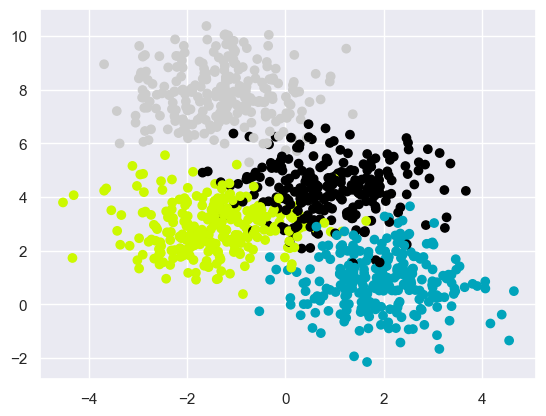

In [5]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [7]:
labels

array([3, 0, 3, 2, 1, 0, 0, 1, 0, 0, 3, 1, 2, 3, 1, 2, 2, 3, 0, 1, 0, 3,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 3, 2, 3, 0, 3, 0, 2, 2, 0, 0, 0, 2,
       3, 0, 0, 3, 2, 0, 1, 0, 0, 2, 3, 1, 0, 0, 3, 3, 1, 1, 2, 2, 2, 3,
       0, 2, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 3, 2, 1,
       0, 0, 2, 3, 2, 2, 0, 2, 1, 1, 1, 3, 2, 2, 0, 1, 0, 3, 2, 1, 1, 0,
       2, 0, 0, 0, 2, 0, 1, 3, 1, 3, 1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 0, 0,
       2, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 3, 3, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 3, 2, 0, 1, 1, 2, 3, 2, 3,
       2, 2, 2, 0, 3, 3, 1, 1, 2, 0, 3, 0, 3, 2, 0, 3, 2, 0, 0, 1, 1, 3,
       0, 0, 0, 3, 0, 0, 0, 2, 3, 3, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 2, 3, 2, 2, 1, 2, 0, 3, 0, 1, 3, 0, 1,
       3, 2, 0, 2, 3, 1, 1, 0, 1, 2, 3, 3, 2, 3, 2, 0, 1, 3, 2, 0, 2, 2,
       2, 0, 2, 3, 1, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1,

In [8]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))

In [9]:
X_train = X_train.float()
Y_train = Y_train.long()

In [10]:
X_val = X_val.float()
Y_val = Y_val.long()

In [11]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [12]:
class FirstNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2)
    self.lin2 = nn.Linear(2, 4)

  def forward(self, X):
    a1 = self.lin1(X)
    h1 =  nn.Sigmoid()(a1)
    a2 = self.lin2(h1)
    h2 =  nn.Softmax()(a2)
    return h2

In [13]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

In [14]:
X_train.shape

torch.Size([750, 2])

In [15]:
fn = FirstNetwork()

In [16]:
fn

FirstNetwork(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (lin2): Linear(in_features=2, out_features=4, bias=True)
)

In [17]:
y_hat = fn(X_train)

In [ ]:
Y_train

In [ ]:
y_hat.argmax(axis=1)

In [34]:
opt = optim.SGD(fn.parameters(), lr=.1)

In [49]:
loss = F.cross_entropy(y_hat, Y_train)

In [54]:
loss.item()

1.3949565887451172

In [44]:
loss.backward()

In [45]:
opt.step()

In [46]:
opt.zero_grad()

In [1]:
1000

1000

In [2]:
1000/20

50.0

In [29]:
X_train2 = [X_train[i:i+50] for i in range(0,len(X_train),50)]

In [32]:
sum([len(i) for i in X_train2])

750

In [26]:
X_train.shape

torch.Size([750, 2])

In [34]:
fn = FirstNetwork()

def fit(epochs = 10, learning_rate = 1):
  loss_arr = []
  acc_arr_train = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)

  for epoch in range(epochs):
    for da in X_train2:
        y_hat = fn(da)
        loss = F.cross_entropy(y_hat, Y_train)
        print(epoch,loss.item())
        loss_arr.append(loss.item())
        acc_arr_train.append(accuracy(y_hat, Y_train))

        loss.backward()
        opt.step()
        opt.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr_train, 'g-')
  plt.show()
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

In [35]:
fit()

ValueError: Expected input batch_size (50) to match target batch_size (750).

In [75]:
list(fn.parameters())

[Parameter containing:
 tensor([[ 0.0729,  0.3745],
         [-0.4876, -0.5688]], requires_grad=True),
 Parameter containing:
 tensor([-0.2466,  0.1979], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0267,  0.4980],
         [-0.1902,  0.2112],
         [-0.2643, -0.0196],
         [-0.5382, -0.5491]], requires_grad=True),
 Parameter containing:
 tensor([-0.2867,  0.0233,  0.2553,  0.4467], requires_grad=True)]

In [82]:
list(fn.children())[0].bias

Parameter containing:
tensor([-0.2466,  0.1979], requires_grad=True)

In [78]:
for layer in fn.children():
    if isinstance(layer, nn.Linear):
        print('weight:', layer.weight)
        print('bias:', layer.bias)

weight: Parameter containing:
tensor([[ 0.0729,  0.3745],
        [-0.4876, -0.5688]], requires_grad=True)
bias: Parameter containing:
tensor([-0.2466,  0.1979], requires_grad=True)
weight: Parameter containing:
tensor([[ 0.0267,  0.4980],
        [-0.1902,  0.2112],
        [-0.2643, -0.0196],
        [-0.5382, -0.5491]], requires_grad=True)
bias: Parameter containing:
tensor([-0.2867,  0.0233,  0.2553,  0.4467], requires_grad=True)


In [ ]:
# Make predictions
fn.eval()
with torch.no_grad():
    y_pred_test = fn(X_val)

In [ ]:
accuracy(y_pred_test,Y_val)

tensor(0.8880)

In [ ]:
import torch.nn as nn
class mymodel(nn.Module):
  def __init__(self):
    super(mymodel, self).__init__()
    print('in cons')

  def forward(self,a):
    return a

In [ ]:
fn = mymodel()

in cons


In [ ]:
fn(12)

12

In [ ]:
!) implement a complex model to get high acc
2) display cm
3) classification report

In [83]:
# With square kernels and equal stride
m = nn.Conv3d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.Conv3d(16, 33, (3, 5, 2), stride=(2, 1, 1), padding=(4, 2, 0))
input = torch.randn(20, 16, 10, 50, 100)
output = m(input)

In [ ]:
output

In [88]:
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# non-square kernels and unequal stride and with padding and dilation
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 45, 100)
output = m(input)

In [89]:
input.shape

torch.Size([20, 16, 45, 100])

In [36]:
# 60

In [37]:
# 30

In [ ]:
10+2

50%

50%

15

30+20+60 -> 10

In [ ]:
1) Cnn visualizer
2) 